This is an example for a notebook to be used with the random matrix class. 

It contains a first simple analysis of the signs of the eigenvalues of inverse distance matrices and compares these signs for various distributions. 

In [1]:
# Import of the libraries. The notebook is numpy. For GPU systems the calculation 
# in RandomMatrix can be done with cupy and cupy is imported automatically if available.

import numpy as np
import RandomMatrix as rm
import matplotlib.pyplot as plt

General setup for a simulation with varying n_values

In [2]:
# create png flag for saving figures
create_png = False

# the number of targets
n_values = [2, 4, 8, 16, 32, 64, 80, 100, 150, 200]
n_values_np = np.array(n_values)

# the distribution of the targets
# 'normal' for normal distribution, 'uniform' for uniform distribution
distribution = 'normal' # 'normal', 'uniform', 'cube', 'sphere', 'circle', 'student_t'

# which space dimension to use, totally experimental
space_dimension = 3

# 'correlated' for correlated matrices, 'uncorrelated' for uncorrelated matrices
# Note: Uncorrelated matrices are not yet supported in the MatrixInverseDistance3D class
correlated = True # True or False

# use a different exponent
exponent = -1 # -1 for inverse distance, -2 for inverse square distance, etc.
logarithmic = False # use logarithmic scaling in this case exponent is ignored
logscale = 0.05 # the scale of the logarithmic distribution

# hardcore is the minimum distance between targets
hardcore = 0.001 # minimum distance between targets, 0.0 means no hardcore

# is the ensemble length scale changed with N^(1/3) to keep the density constant?
scaled = False

# the goe spacing range for eigenvalue spacing analysis
goe_spacing_range = 2

# the sample size of the first simulation
sample_size_first = 400
sample_strategy = 'homogenous' # 'homogenous', 'nsqrt' or 'n'

# generate the sample sizes for each n
sample_values = []
for n in n_values:
    if sample_strategy == 'homogenous':
        sample_value = sample_size_first
    elif sample_strategy == 'nsqrt':
        sample_value = sample_size_first * np.sqrt( n_values[0] / n )
    elif sample_strategy == 'n':
        sample_value = sample_size_first * ( n_values[0] / n ) 
    else:
        raise ValueError("Unknown sample strategy: {}".format(sample_strategy))
    if sample_value < 1:
        sample_value = 1
    else:
        sample_value = int(sample_value)
    sample_values.append(sample_value)
    
print("N values:", n_values)
print("Sample values:", sample_values)

matrices = []
simulations = []
for n in n_values:
    #if correlated:
        # Create a correlated matrix using the MatrixInverseDistance3D class
        # Note: This class is designed for 3D distributions, so we use it for correlated matrices
    G = rm.MatrixInverseDistance(n, distribution=distribution, 
                                        scaled=scaled, 
                                        exponent=exponent,
                                        logarithmic=logarithmic, 
                                        logscale=logscale,
                                        hardcore=hardcore,
                                        dimension=space_dimension,
                                        correlated=correlated)
    #else:
        # Create an uncorrelated matrix using the MatrixUncorrelated class, only 
        # limited support for distributions
        # G = rm.MatrixUncorrelated(n, scaled=scaled)
    matrices.append(G)
    S = rm.Simulation(G)
    simulations.append(S)

N values: [2, 4, 8, 16, 32, 64, 80, 100, 150, 200]
Sample values: [400, 400, 400, 400, 400, 400, 400, 400, 400, 400]
MatrixInverseDistance initialized with parameters:
N: 2, scaled: False, distribution: normal, hardcore: 0.001, solver: numpy, correlated: True, exponent: -1, logarithmic: False, logscale: (0.05,), space_dimension: 3
MatrixInverseDistance initialized with parameters:
N: 4, scaled: False, distribution: normal, hardcore: 0.001, solver: numpy, correlated: True, exponent: -1, logarithmic: False, logscale: (0.05,), space_dimension: 3
MatrixInverseDistance initialized with parameters:
N: 8, scaled: False, distribution: normal, hardcore: 0.001, solver: numpy, correlated: True, exponent: -1, logarithmic: False, logscale: (0.05,), space_dimension: 3
MatrixInverseDistance initialized with parameters:
N: 16, scaled: False, distribution: normal, hardcore: 0.001, solver: numpy, correlated: True, exponent: -1, logarithmic: False, logscale: (0.05,), space_dimension: 3
MatrixInverseDista

Simulation - Runtime on MacBook Pro 11 minutes

In [22]:
for S in simulations:
    S.random_seed(42)
    sample_size = sample_values[simulations.index(S)]
    print("n =", S.Matrix.N, "Sample size =", sample_size, "Randomness:", 3*S.Matrix.N*sample_size)
    S.sample(sample_size)
    print("Finished with hardcore count:", S.Matrix.hardcore_count, ", element average:", S.element_average)

n = 2 Sample size = 400 Randomness: 2400
Finished with hardcore count: 0.0 , element average: 0.6087710245879677
n = 4 Sample size = 400 Randomness: 4800
Finished with hardcore count: 0.0 , element average: 0.5659501825003542
n = 8 Sample size = 400 Randomness: 9600
Finished with hardcore count: 0.0 , element average: 0.5574524122186748
n = 16 Sample size = 400 Randomness: 19200
Finished with hardcore count: 0.0 , element average: 0.5618758168313662
n = 32 Sample size = 400 Randomness: 38400
Finished with hardcore count: 0.0 , element average: 0.5632206029728737
n = 64 Sample size = 400 Randomness: 76800
Finished with hardcore count: 0.0 , element average: 0.5633391148331315
n = 80 Sample size = 400 Randomness: 96000
Finished with hardcore count: 0.0 , element average: 0.5633483509075022
n = 100 Sample size = 400 Randomness: 120000
Finished with hardcore count: 0.0 , element average: 0.5638281833900534
n = 150 Sample size = 400 Randomness: 180000
Finished with hardcore count: 0.0 , ele

In [24]:
for S in simulations:
    S.print_results()

--------------------- Simulation --------------------------
Sampled matrices: 400 from MatrixInverseDistance
  Dimension: 2 Distribution: normal Correlated: True
  Hard core distance: 0.001 Hard core count: 0.0
  Parameter1: 1.0 Parameter2: 0.0
  Exponent: -1 Logarithmic: False Logscale: (0.05,)
----------------------- Results ----------------------------
Matrix element average: 0.6087710245879677 std: 0.8286988573297662
Inverse of element average: 1.642653739436476
Average maximum row sum: 15.144636242963399 std: 0.8286988573297661
Average row sum: 0.6087710245879677 std: 0.8286988573297662
Average minimum row sum: 0.18509858713729715 std: 0.8286988573297661
Average nearest neighbor distance: 2.2125132512733257 std: 0.9202120474388278
Inverse of average nearest neighbor distance: 0.4519746941287195
Average of inverse nearest neighbor distance: 0.6087710245879677 std: 0.8286988573297661
Average smallest distance in matrix: 2.2125132512733257 std: 0.9202120474388278
--------------------

When does the asymptotic in N of the observables kick in. Typically when the dominant correction is 1/N.

In [5]:
# the asymptotic region
n_asym = 32
n_values_asym = n_values_np[n_values_np >= n_asym]

In [26]:
positive = []
positive_std = []
negative = []
negative_std = []
for S in simulations:
    positive.append(np.mean(S.positive)/S.Matrix.N)
    negative.append(np.mean(S.negative)/S.Matrix.N)
    positive_std.append(np.std(S.positive)/S.Matrix.N)
    negative_std.append(np.std(S.negative)/S.Matrix.N)
    print("N =", S.Matrix.N, "Positive %:", np.mean(S.positive)/S.Matrix.N, "std:", np.std(S.positive)/S.Matrix.N)

N = 2 Positive %: 0.5 std: 0.0
N = 4 Positive %: 0.279375 std: 0.08050378484891255
N = 8 Positive %: 0.2853125 std: 0.064067073007513
N = 16 Positive %: 0.2840625 std: 0.0338294781773234
N = 32 Positive %: 0.273359375 std: 0.023463397150868308
N = 64 Positive %: 0.26859375 std: 0.014896288600268861
N = 80 Positive %: 0.268375 std: 0.013457688323036763
N = 100 Positive %: 0.2682 std: 0.01293290377293514
N = 150 Positive %: 0.2664666666666667 std: 0.009704752558526274
N = 200 Positive %: 0.2653125 std: 0.008534626163459064


Analysis of the signs of the eigenvalues: 

The ratio of negative and positive eigenvalues is plotted and compared with a situation where only the Perron eigenvalue is positive. This is true for distance matrices.

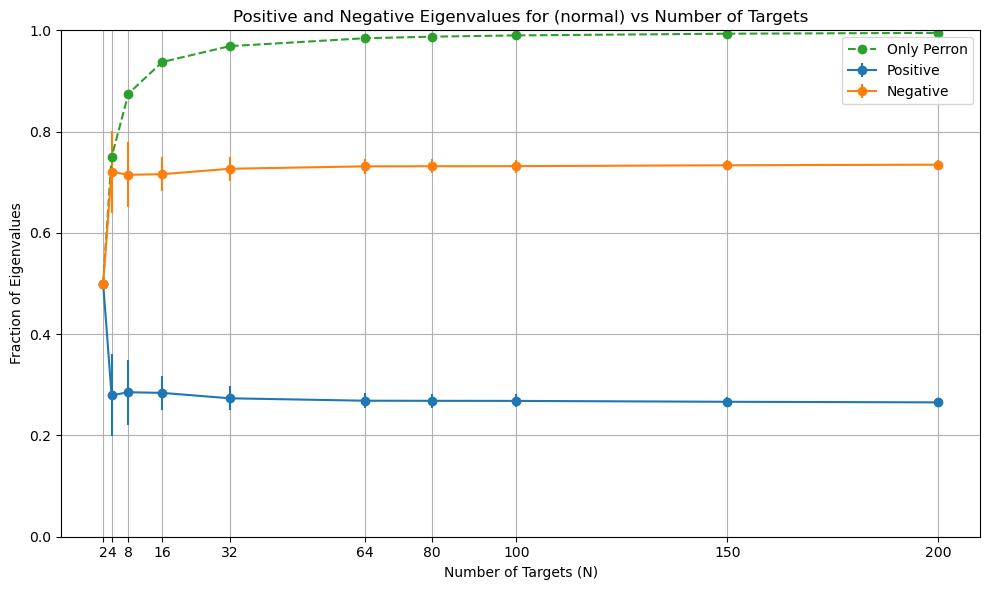

In [33]:
def one_over_n(n):
    return 1 / n if n != 0 else 0

only_perron = [1 - one_over_n(n) for n in n_values]

plt.figure(figsize=(10, 6))
plt.errorbar(n_values, positive, yerr=positive_std, label='Positive', marker='o')
plt.errorbar(n_values, negative, yerr=negative_std, label='Negative', marker='o')
plt.plot(n_values, only_perron, label='Only Perron', marker='o', linestyle='--')
plt.xlabel('Number of Targets (N)')
plt.ylabel('Fraction of Eigenvalues')
plt.title('Positive and Negative Eigenvalues for (' + distribution + ') vs Number of Targets')
plt.xticks(n_values)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.tight_layout()
if create_png:
    plt.savefig('positive_negative_samples_vs_n_' + distribution + '.png', dpi=300)
plt.show()

In [ ]:
# use the last value as prediction as an input for the derivation of the 1/N correction
negative = np.array(negative)
prediction = negative[-1]
deviations = negative - prediction

A few extrapolation functions

In [10]:
# fitting functions for the assymptotic region
from scipy.optimize import curve_fit

# used for assymptotic region of the sign
def inv_func(x, a, b):
    return a / np.array(x) + b

# higher order terms for pf eigenvalues
def inv_func2(x, a, b, c):
    return a / x + b + c / x ** 2

# logarithmic correction terms
def inv_func_log(x, a, b, c):
    return a / np.array(x) + b + c / np.log(x)

# pure llogarithmic dependence
def log_func(x, a, b):
    return a / np.log(x) + b

# wigner distribution
def wigner(x, sigma):
    return (2 / (np.pi * sigma**2)) * np.sqrt(sigma**2 - x**2) * (np.abs(x) <= sigma)

In [30]:
# the n_values in the assymptotic region of the sign fit
deviations_signfit = deviations[n_values_np >= n_asym] 

params, covariance = curve_fit(inv_func, n_values_asym, deviations_signfit)
a_fit, b_fit = params

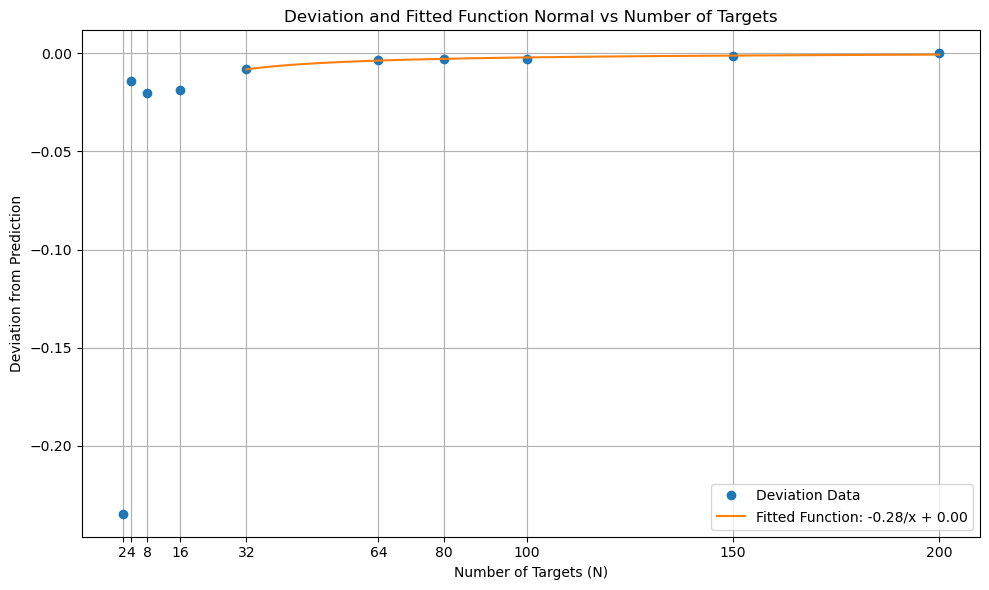

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(n_values, deviations, 'o', label='Deviation Data')
x_fit = np.linspace(min(n_values_asym), max(n_values_asym), 200)
y_fit = a_fit / x_fit + b_fit
plt.plot(x_fit, y_fit, '-', label=f'Fitted Function: {a_fit:.2f}/x + {b_fit:.2f}')
plt.xlabel('Number of Targets (N)')
plt.ylabel('Deviation from Prediction')
plt.title('Deviation and Fitted Function Normal vs Number of Targets')
plt.xticks(n_values)
#plt.ylim(-0.1, 0.01)
plt.grid()
plt.legend()
plt.tight_layout()
if create_png:
    plt.savefig('deviation_and_fit_vs_n_normal.png', dpi=300)
plt.show()

In [38]:
print("Initial prediction of ratio of negative values:", prediction)
print("Predicted assymptotic value of ratio of negative values:", b_fit + prediction)
print(" 1 / N correction:", a_fit)
print("Result: |S-| = ",  b_fit + prediction, " + 1 / N * ", a_fit)
print("Standard deviation of last value:", negative_std[-1])

Initial prediction of ratio of negative values: 0.7346875
Predicted assymptotic value of ratio of negative values: 0.735460925169835
 1 / N correction: -0.2847034572173815
Result: |S-| =  0.735460925169835  + 1 / N *  -0.2847034572173815
Standard deviation of last value: 0.008534626163459064
